In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

%run -i "../src/utils.py"

In [2]:
prefix = 'BESTClassicCNN_aug'
names = [
    'brightness_contrast0.5',
    'flip0.5',
    'gauss_noise0.5',
    'hue_saturation_value0.5',
    'transpose0.5',
    'flip0.5_gauss_noise0.5',
]

names = [prefix + '_' + name for name in names]
names


['BESTClassicCNN_aug_brightness_contrast0.5',
 'BESTClassicCNN_aug_flip0.5',
 'BESTClassicCNN_aug_gauss_noise0.5',
 'BESTClassicCNN_aug_hue_saturation_value0.5',
 'BESTClassicCNN_aug_transpose0.5',
 'BESTClassicCNN_aug_flip0.5_gauss_noise0.5']

In [3]:
df = pd.DataFrame()
best_name = ''
for name in names:
    df_ = pd.DataFrame()
    model_info = get_model_info(name)
    average_acc = np.mean(model_info['acc'])
    std_acc = np.std(model_info['acc'])
    min_acc = np.min(model_info['acc'])
    max_acc = np.max(model_info['acc'])
    df_['augmentation'] = [name]
    df_['average_acc'] = [average_acc]
    df_['std_acc'] = [std_acc]
    df_['min_acc'] = [min_acc]
    df_['max_acc'] = [max_acc]
    df = pd.concat([df, df_])
    if average_acc >= df['average_acc'].max():
        best_name = name
        
df.reset_index(drop=True, inplace=True)
df.sort_values(by='average_acc', ascending=False, inplace=True)
df['augmentation'] = df['augmentation'].str[19:]
df.round(5)

,augmentation,average_acc,std_acc,min_acc,max_acc
5,flip0.5_gauss_noise0.5,0.64550,0.00486,0.63676,0.65168
1,flip0.5,0.64254,0.01107,0.62903,0.66031
2,gauss_noise0.5,0.58783,0.00272,0.58444,0.59277
3,hue_saturation_value0.5,0.55133,0.04925,0.46763,0.59862
0,brightness_contrast0.5,0.53805,0.05891,0.45599,0.58961
4,transpose0.5,0.53208,0.09584,0.40293,0.61428


In [4]:
# read labels from labels.json
labels = dict()
with open('labels.json') as f:
    labels = json.load(f)
# reverse the dictionary
labels = {v: k for k, v in labels.items()}
labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [5]:
print(best_name)
print(np.argmax(get_model_info(best_name)['acc']))

BESTClassicCNN_aug_flip0.5_gauss_noise0.5
2


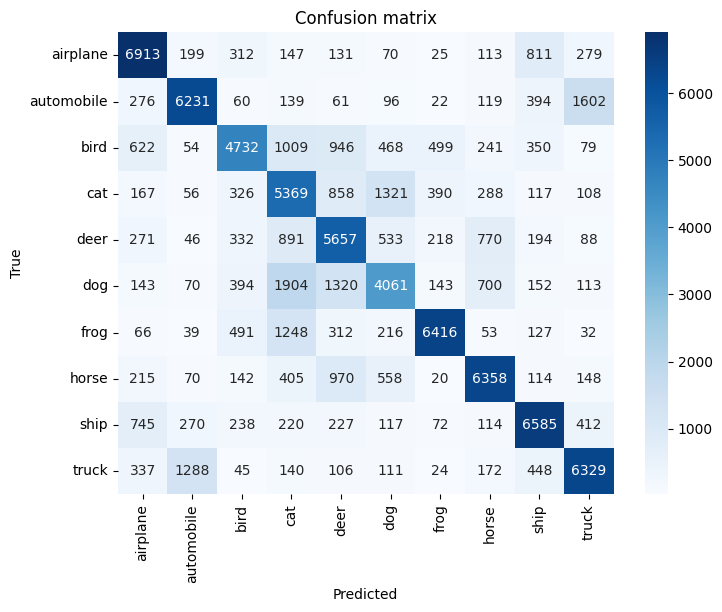

In [6]:
model_info = get_model_info(best_name)
model_info['conf_matrix'][np.argmax(model_info['acc'])]

model_info = get_model_info(best_name)
conf_matrix = model_info['conf_matrix'][np.argmax(model_info['acc'])]

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion matrix')
ax.set_xticks(np.arange(10) + 0.5)
ax.set_xticklabels([labels[i] for i in range(10)], rotation=90)
ax.set_yticks(np.arange(10) + 0.5)
ax.set_yticklabels([labels[i] for i in range(10)], rotation=0)
plt.show()